<img src = "../imgs/Banner_Logo.JPEG"/>



# <center> 07. Image Classification Practise! </center>

In [1]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# 1) Read all the data from your source

In this part, we are going to work in a tennis ball classification.

The idea is to predict if there is or there isn't a ball in the image.

The dataset can be downloaded from the official dataset site: [1] here (https://www.kaggle.com/domhenjes/ballsemtpytt)

In [17]:
train_non_ball_path = "ballsemtpytt/train/empty/"
train_ball_path = "ballsemtpytt/train/balls/"
test_non_ball_path = "ballsemtpytt/test/empty/"
test_ball_path = "ballsemtpytt/test/balls/"
print("=================Folders===============================")
print("Path to the balls folder in training:", train_ball_path)
print("Path to the non - balls folder in training:", train_non_ball_path)
print("Path to the balls folder in testing:", test_ball_path)
print("Path to the non - balls folder in testing:", test_non_ball_path)
print("=================Folders===============================")
num_to_class = {0:"Non ball", 1:"Ball"}
#Get all the images names inside of a given folder
train_ball_images_list = os.listdir(train_ball_path)
train_non_ball_images_list = os.listdir(train_non_ball_path)
test_ball_images_list = os.listdir(test_ball_path)
test_non_ball_images_list = os.listdir(test_non_ball_path)
#Creates 4 lists to handle the images of each class
X_train_ball_images = []
X_train_non_ball_images = []
X_test_ball_images = []
X_test_non_ball_images = []
#Adds all the images with balls
print("=======================================================")
print("Training!")
print("Loading all the balls images ...")
for image in train_ball_images_list:
    current_image = cv.imread( train_ball_path+"/"+image, cv.IMREAD_GRAYSCALE )
    X_train_ball_images.append(current_image)
    
print("All the balls images loaded sucessfully")
print("Loading all the non balls images ...")

#Adds all the images without balls
for image in train_non_ball_images_list:
    current_image = cv.imread( train_non_ball_path+"/"+image, cv.IMREAD_GRAYSCALE )
    X_train_non_ball_images.append(current_image)
    
print("All the non balls images loaded sucessfully")
print("=======================================================")
#Adds all the images with balls
print("=======================================================")
print("Testing!")
print("Loading all the balls images ...")
for image in test_ball_images_list:
    current_image = cv.imread( test_ball_path+"/"+image, cv.IMREAD_GRAYSCALE )
    X_test_ball_images.append(current_image)
    
print("All the balls images loaded sucessfully")
print("Loading all the non balls images ...")

#Adds all the images without balls
for image in test_non_ball_images_list:
    current_image = cv.imread( test_non_ball_path+"/"+image, cv.IMREAD_GRAYSCALE )
    X_test_non_ball_images.append(current_image)
    
print("All the non balls images loaded sucessfully")
print("=======================================================")

#Converts lists into numpy arrays!
X_train_ball_images = np.array(X_train_ball_images)
X_train_non_ball_images = np.array(X_train_non_ball_images)
X_test_ball_images = np.array(X_test_ball_images)
X_test_non_ball_images = np.array(X_test_non_ball_images)

#Set the labels for both classes.
train_total_balls_images = len(X_train_ball_images)
train_total_non_balls_images = len(X_train_non_ball_images)
test_total_balls_images = len(X_test_ball_images)
test_total_non_balls_images = len(X_test_non_ball_images)

=================Folders===============================
Path to the balls folder in training: ballsemtpytt/train/balls/
Path to the non - balls folder in training: ballsemtpytt/train/empty/
Path to the balls folder in testing: ballsemtpytt/test/balls/
Path to the non - balls folder in testing: ballsemtpytt/test/empty/
=================Folders===============================
Training!
Loading all the balls images ...
All the balls images loaded sucessfully
Loading all the non balls images ...
All the non balls images loaded sucessfully
Testing!
Loading all the balls images ...
All the balls images loaded sucessfully
Loading all the non balls images ...
All the non balls images loaded sucessfully


## 2) Know your dataset.

- How many samples do we have for training and testing?
- How are the classes distributed? 
- Do we have a balanced problem or seems it is unbalanced?
- Which are the image dimensions?

In [3]:
print("Training!")
print("Ball images shape: ", X_train_ball_images.shape)
print("Non ball images shape: ", X_train_non_ball_images.shape)

print("Testing!")
print("Ball images shape: ", X_test_ball_images.shape)
print("Non ball images shape: ", X_test_non_ball_images.shape)

Training!
Ball images shape:  (406, 480, 640)
Non ball images shape:  (417, 480, 640)
Testing!
Ball images shape:  (40, 480, 640)
Non ball images shape:  (40, 480, 640)


In [4]:
#Firstly, we stack all the Ball and non_ball images into 1 single X_train array.
X_train = np.vstack((X_train_ball_images,X_train_non_ball_images))
X_test = np.vstack((X_test_ball_images,X_test_non_ball_images))
#Same for the labels!
Y_train = np.zeros(train_total_balls_images+train_total_non_balls_images)
Y_train[0:train_total_balls_images] = 1

Y_test = np.zeros(test_total_balls_images+test_total_non_balls_images)
Y_test[0:test_total_balls_images] = 1
#Finally, we shuffle the samples.
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train,Y_train)
X_test, Y_test = shuffle(X_test,Y_test)

In [5]:
print("========================================================")
print("Training!")
print("There is a total of {} samples in our training dataset.".format(len(Y_train)))
n_classes = 2
for i in range (n_classes):
    class_name = num_to_class[i]
    number_of_samples = len(Y_train[Y_train == i])
    print("Class: {}-{} has {} number of samples.".format(i,class_name,number_of_samples))
print("========================================================")

print("========================================================")
print("Testing!")
print("There is a total of {} samples in our testing dataset.".format(len(Y_test)))
n_classes = 2
for i in range (n_classes):
    class_name = num_to_class[i]
    number_of_samples = len(Y_test[Y_test == i])
    print("Class: {}-{} has {} number of samples.".format(i,class_name,number_of_samples))
print("========================================================")

Training!
There is a total of 823 samples in our training dataset.
Class: 0-Non ball has 417 number of samples.
Class: 1-Ball has 406 number of samples.
Testing!
There is a total of 80 samples in our testing dataset.
Class: 0-Non ball has 40 number of samples.
Class: 1-Ball has 40 number of samples.


###  3) Visualize your data
Now we going to select and visualize  random image subsets to dimension the problem! 
Check some samples of the data in order to identify possible patterns.

In [6]:
rows = 5
cols = 5
Nsamples = rows*cols
sample_indexes = np.random.randint(low=0 , high= len(X_train), size = Nsamples)
plt.figure(figsize=(15,15))

for i in range (Nsamples):
    plt.subplot(rows,cols,(i+1))
    index = sample_indexes[i]
    image_i = X_train[index]
    class_i = Y_train[index]
    plt.axis('off')
    plt.imshow(image_i, cmap='gray')
    plt.title(num_to_class[class_i])
    

In [7]:
def plot_image_sample(index):
    current_image = X_test[index]
    current_label = Y_test[index]
    plt.figure(figsize=(7,7))
    plt.imshow(current_image,cmap = 'gray')
    plt.axis("off")
    plt.title(num_to_class[current_label])
    
interact(plot_image_sample, index= widgets.IntSlider(min=0, max=len(X_train)-1, step=1, value=10))

interactive(children=(IntSlider(value=10, description='index', max=822), Output()), _dom_classes=('widget-inte…

<function __main__.plot_image_sample(index)>

## 4) Choose a descriptor

Convert each sample of your data into a vector that perfectly describes your problem with important features!
<img src="../imgs/descriptor1.png"/>

In this case, I will just use a flatten which is very basic and it is not always the best option to choose.

<img src="../imgs/descriptor2.png"/>

Try to propose new descriptors, for example: Histograms

<img src="../imgs/descriptor3.png"/>

In [8]:
train_samples, width, height = X_train.shape
test_samples, width, height = X_test.shape
trainX_flatten = np.reshape(X_train, newshape=(len(X_train),width*height))
testX_flatten = np.reshape(X_test, newshape=(len(X_test),width*height))
print(trainX_flatten.shape)
print(testX_flatten.shape)

(823, 307200)
(80, 307200)


## 5) Select a classification model
### <span style="color:red">KNN simple classification </span> 

It is one of the simplest of classification algorithms available for supervised learning. The idea is to search for closest match of the test data in feature space. 

<img src="../imgs/classification_1.png" style="width:500px;heigth:100px">

### The main steps of the KNN algorithm

1. Calculate the distance between the new point and every other point
    - Sort the distances
2. Pick K minimum distances from the list of sorted distances
3. Use majority voting to get the color of the point

<img src="../imgs/classification_2.png" style="width:800px;heigth:100px">

[2 KNN](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)

#### Go to the actions!

Firstly check the shape of your train and test folds.

## 6) Prove your method with Cross validation

#### This is the perfect moment to tune all the hyperparameters!

<img src="../imgs/cross_validation.png" style="width:500px;heigth:100px">

Cross validation is an important technique to evaluate statistically how well or how bad our model is classifying independent of our dataset.

Instead of 1 single result we can get K different results!

[3 Kfold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)

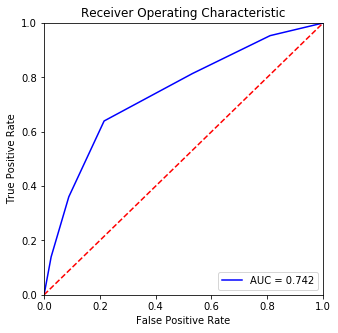

Fold # 1 : Score: 0.7090909090909091
Fold # 1 : ROC-AUC: 0.7424197821607301


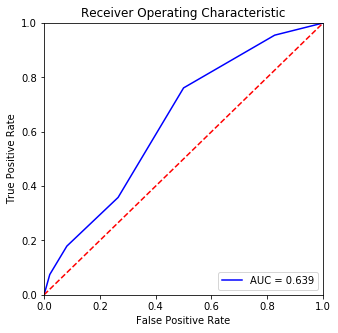

Fold # 2 : Score: 0.5818181818181818
Fold # 2 : ROC-AUC: 0.6390496497106305


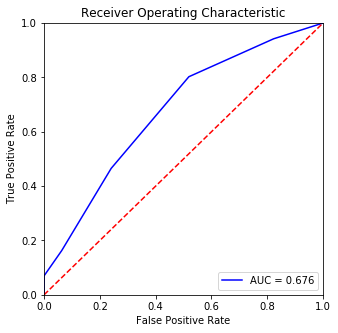

Fold # 3 : Score: 0.6060606060606061
Fold # 3 : ROC-AUC: 0.6764792463938769


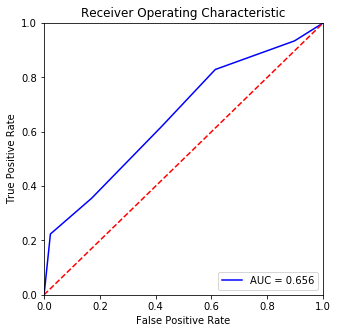

Fold # 4 : Score: 0.5975609756097561
Fold # 4 : ROC-AUC: 0.6561752392344498


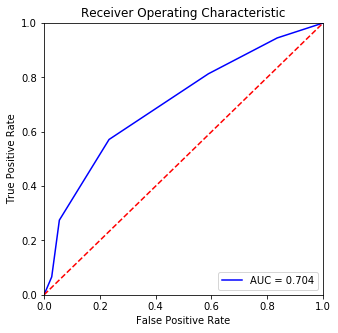

Fold # 5 : Score: 0.6585365853658537
Fold # 5 : ROC-AUC: 0.7041246424808069


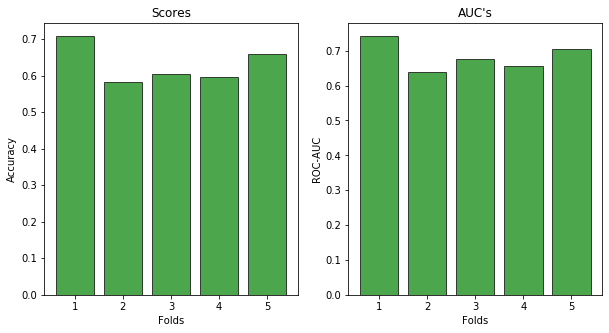

Accuracy in validation: 63.0613%
Standard deviation: 4.6935%
AUC-ROC in validation: 68.3650%
Standard deviation AUC-ROC: 3.6520%


In [23]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
def perform_cross_validation(k=8):
    from sklearn.model_selection import KFold
    scores = []
    aucs=[]
    model = KNeighborsClassifier(n_neighbors=5)
    kfold = KFold(n_splits=k)
    data = trainX_flatten
    labels = Y_train
    i = 0
    for train, test in kfold.split(data, Y_train):
        i = i + 1
        model.fit(data[train], labels[train])
        score_i = model.score(data[test], labels[test])
        probabilities_test = model.predict_proba(data[test])
        fpr, tpr, threshold = metrics.roc_curve(labels[test], probabilities_test[:,1])
        roc_auc = metrics.auc(fpr, tpr)
        plt.figure(figsize=(5,5))
        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label = 'AUC = {:.3f}'.format(roc_auc))
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
        scores.append(score_i)
        aucs.append(roc_auc)
        print("====================================================================")
        print("Fold # {} : Score: {}".format(i,score_i))
        print("Fold # {} : ROC-AUC: {}".format(i,roc_auc))

        print("====================================================================")
    
    split_numbers = np.linspace(start=1, stop=k , num=k)
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    score_bar = plt.bar(split_numbers,scores,  alpha=0.7, edgecolor='k', width=0.8, color="green")
    plt.title("Scores")
    plt.xlabel("Folds")
    plt.ylabel("Accuracy")
    plt.subplot(1,2,2)
    score_bar = plt.bar(split_numbers,aucs,  alpha=0.7, edgecolor='k', width=0.8, color="green")
    plt.title("AUC's")
    plt.xlabel("Folds")
    plt.ylabel("ROC-AUC")
    plt.show()
    print("Accuracy in validation: {:.4f}%".format(np.mean(scores)*100))
    print("Standard deviation: {:.4f}%".format(np.std(scores)*100))
    print("AUC-ROC in validation: {:.4f}%".format(np.mean(aucs)*100))
    print("Standard deviation AUC-ROC: {:.4f}%".format(np.std(aucs)*100))
            
perform_cross_validation(5)

## 7) Test your method!

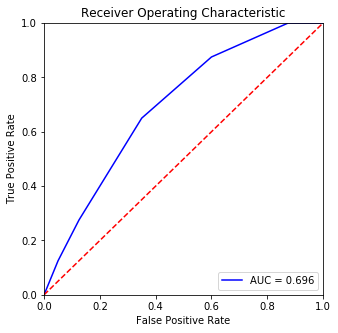

Accuracy in test: 65.0000%
ROC-AUC in test: 69.5625%


In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(trainX_flatten, Y_train)
test_prediction = model.predict(testX_flatten)
test_probabilities = model.predict_proba(testX_flatten)
fpr, tpr, threshold = metrics.roc_curve(Y_test, test_probabilities[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = {:.3f}'.format(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
#cm_test = confusion_matrix(Y_test, test_prediction)
# print("=====================================================================================")
# print("Confusion Matrix in testing")
# print (cm_test)
# print("=====================================================================================")

print("Accuracy in test: {:.4f}%".format(model.score(testX_flatten,Y_test)*100))
print("ROC-AUC in test: {:.4f}%".format(roc_auc*100))

## <span style="color:orange"> Student challenge</span>:
+ 1) Reproduce the same experiment but, try with a different number of folds
+ 2) Variate the number of neighbors of your KNN!
+ 3) Try with a different classifier such as: GaussianNB, DecisionTree, RandomForest or SVM.
+ 4) What if you try to use a histogram instead of pixel intensities?

# References

 + [1 Binary Tennis Ball classification](https://www.kaggle.com/domhenjes/ballsemtpytt)
 + [2 KNN](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
 + [3 Kfold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)
 

<img src="../imgs/bannerThanks.jpg" style="width:1000px;">